In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv("FoDS-A1.csv")
train=data.sample(frac=0.7)
test=data.drop(train.index)
sigma1=train["Strength"].std()
sigma2=train["Temperature"].std()
sigma3=train["Pressure"].std()
mean1=train["Strength"].mean()
mean2=train["Temperature"].mean()
mean3=train["Pressure"].mean()

train["Strength"]=(train["Strength"]-mean1)/sigma1
train["Temperature"]=(train["Temperature"]-mean2)/sigma2
train["Pressure"]=(train["Pressure"]-mean3)/sigma3

test["Strength"]=(test["Strength"]-mean1)/sigma1
test["Temperature"]=(test["Temperature"]-mean2)/sigma2
test["Pressure"]=(test["Pressure"]-mean3)/sigma3

In [4]:
df_train=pd.DataFrame()
x1=train["Strength"].to_numpy()
x2=train["Temperature"].to_numpy()
ones=np.ones((train.shape[0],1))
df_train=pd.concat([df_train,pd.DataFrame(ones)],ignore_index=True,axis=1)
df_train=pd.concat([df_train,pd.DataFrame(x1)],ignore_index=True,axis=1)
df_train=pd.concat([df_train,pd.DataFrame(x2)],ignore_index=True,axis=1)
df_train

0         1         2
0     1.0 -0.145493 -0.293824
1     1.0  0.933354 -0.293824
2     1.0  0.002849  0.331737
3     1.0 -0.617488 -0.919386
4     1.0  0.892898  0.957299
...   ...       ...       ...
1150  1.0  1.742490  1.582860
1151  1.0 -0.428690 -0.919386
1152  1.0 -1.224340 -1.544947
1153  1.0  1.944774  1.582860
1154  1.0  0.933354  0.644518

[1155 rows x 3 columns]

In [5]:
for i in range (2,10):
    for j in range (i+1):
        r=i-j
        arr=np.multiply(np.power(x1,r),np.power(x2,j))
        df_train=pd.concat([df_train,pd.DataFrame(arr)],ignore_index=True,axis=1)

df_train

0         1         2   ...            52            53         54
0     1.0 -0.145493 -0.293824  ... -4.002172e-06 -8.082444e-06  -0.000016
1     1.0  0.933354 -0.293824  ... -1.647052e-04  5.184997e-05  -0.000016
2     1.0  0.002849  0.331737  ...  3.588510e-09  4.178597e-07   0.000049
3     1.0 -0.617488 -0.919386  ... -2.117102e-01 -3.152179e-01  -0.469332
4     1.0  0.892898  0.957299  ...  5.874019e-01  6.297687e-01   0.675191
...   ...       ...       ...  ...           ...           ...        ...
1150  1.0  1.742490  1.582860  ...  7.558543e+01  6.866104e+01  62.370992
1151  1.0 -0.428690 -0.919386  ... -1.020401e-01 -2.188394e-01  -0.469332
1152  1.0 -1.224340 -1.544947  ... -3.149194e+01 -3.973847e+01 -50.144447
1153  1.0  1.944774  1.582860  ...  9.415334e+01  7.663183e+01  62.370992
1154  1.0  0.933354  0.644518  ...  4.024741e-02  2.779242e-02   0.019192

[1155 rows x 55 columns]

In [6]:
df_test=pd.DataFrame()
x1_test=test["Strength"].to_numpy()
x2_test=test["Temperature"].to_numpy()
ones=np.ones((test.shape[0],1))
df_test=pd.concat([df_test,pd.DataFrame(ones)],ignore_index=True,axis=1)
df_test=pd.concat([df_test,pd.DataFrame(x1_test)],ignore_index=True,axis=1)
df_test=pd.concat([df_test,pd.DataFrame(x2_test)],ignore_index=True,axis=1)
df_test

0         1         2
0    1.0  0.110734  0.331737
1    1.0 -1.224340 -0.293824
2    1.0  0.636672  0.331737
3    1.0  0.124219  0.018956
4    1.0  1.459292  0.957299
..   ...       ...       ...
490  1.0  0.771527  0.957299
491  1.0  2.254942  1.582860
492  1.0  0.650157  1.270079
493  1.0 -0.158978 -0.293824
494  1.0  1.189581  1.270079

[495 rows x 3 columns]

In [7]:
for i in range (2,10):
    for j in range (i+1):
        r=i-j
        arr=np.multiply(np.power(x1_test,r),np.power(x2_test,j))
        df_test=pd.concat([df_test,pd.DataFrame(arr)],ignore_index=True,axis=1)

df_test

0         1         2   ...            52            53            54
0    1.0  0.110734  0.331737  ...  5.421476e-06  1.624173e-05  4.865717e-05
1    1.0 -1.224340 -0.293824  ... -2.834118e-04 -6.801486e-05 -1.632261e-05
2    1.0  0.636672  0.331737  ...  1.792213e-04  9.338307e-05  4.865717e-05
3    1.0  0.124219  0.018956  ...  1.357281e-14  2.071272e-15  3.160854e-16
4    1.0  1.459292  0.957299  ...  1.568977e+00  1.029252e+00  6.751912e-01
..   ...       ...       ...  ...           ...           ...           ...
490  1.0  0.771527  0.957299  ...  4.385657e-01  5.441652e-01  6.751912e-01
491  1.0  2.254942  1.582860  ...  1.265810e+02  8.885370e+01  6.237099e+01
492  1.0  0.650157  1.270079  ...  2.253474e+00  4.402153e+00  8.599587e+00
493  1.0 -0.158978 -0.293824  ... -4.778472e-06 -8.831600e-06 -1.632261e-05
494  1.0  1.189581  1.270079  ...  7.544035e+00  8.054538e+00  8.599587e+00

[495 rows x 55 columns]

In [8]:
y_actual_train=train["Pressure"].to_numpy()
y_actual_test=test["Pressure"].to_numpy()
y_actual_train


array([-0.90169237, -1.48612261,  1.43602859, ..., -0.90169237,
       -1.48612261, -1.48612261])

In [66]:

def GD(X,W,eta,Y,iterations,deg,graph):
    training_error = np.zeros((iterations,1))
    
    k=0
    
    for i in range(iterations):
        np.reshape(Y,(1155,1))
        E=np.dot(X,W).T-Y
        training_error[i]=(np.sum(np.multiply(E,E)))/len(X)
        for j in range(W.shape[0]):
            W[j]=W[j]-2*eta*np.sum(np.multiply(E,X[:,j]))/len(X)
        if(i%50==0):
            graph_GD[deg][k]=training_error[i]
            k+=1
    return training_error,W,graph


0
1
2
3
4
5
6
7
8
9


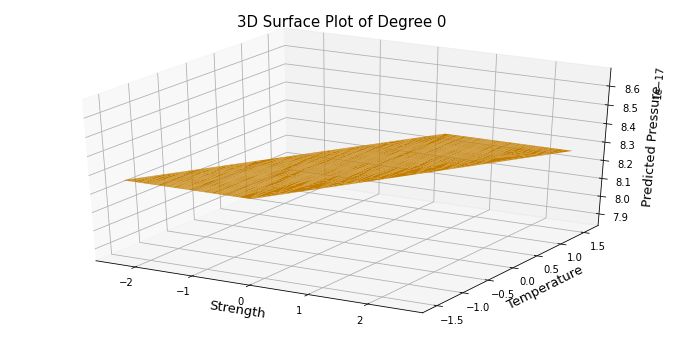

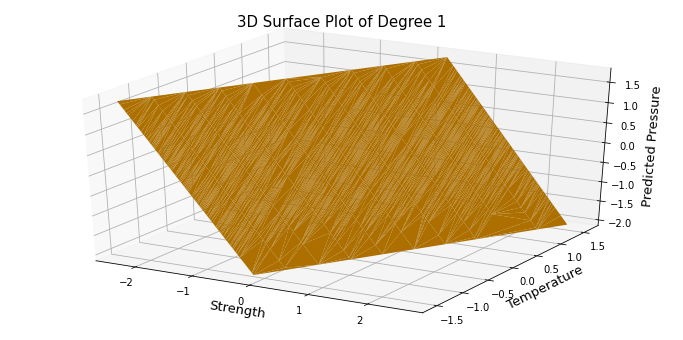

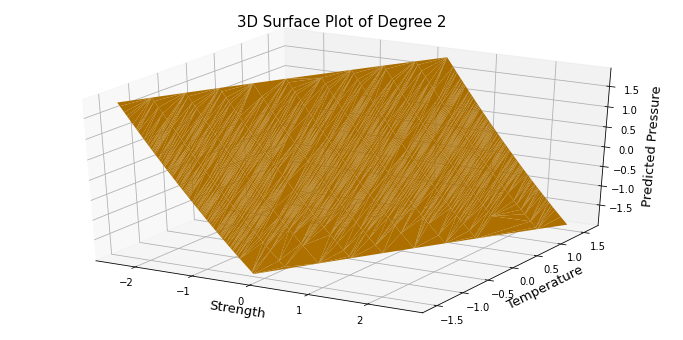

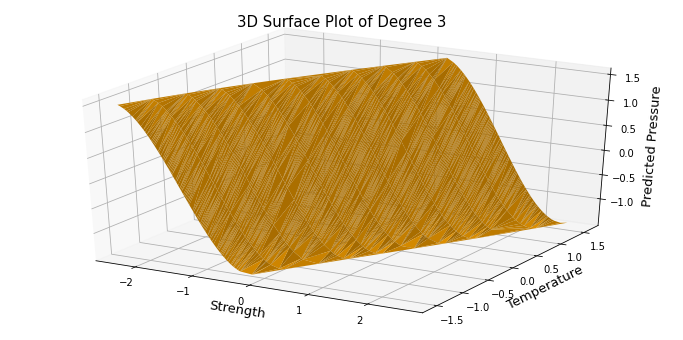

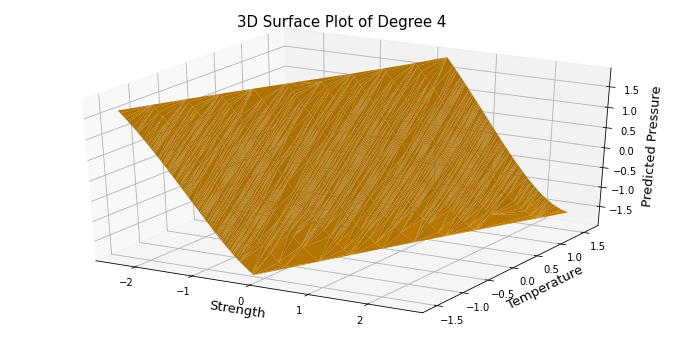

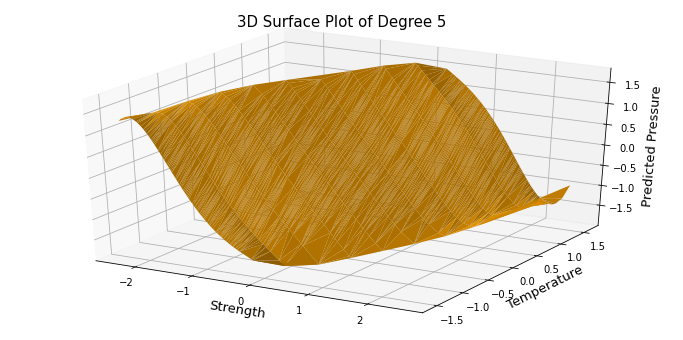

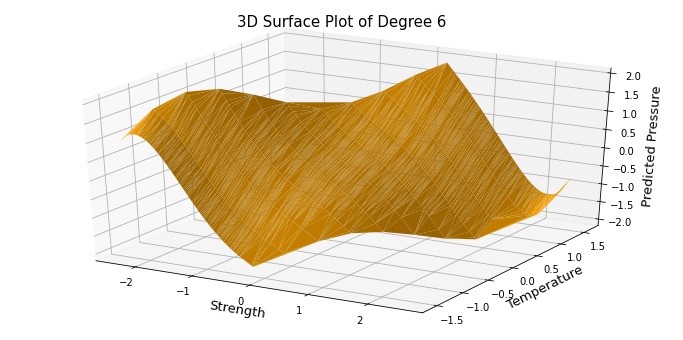

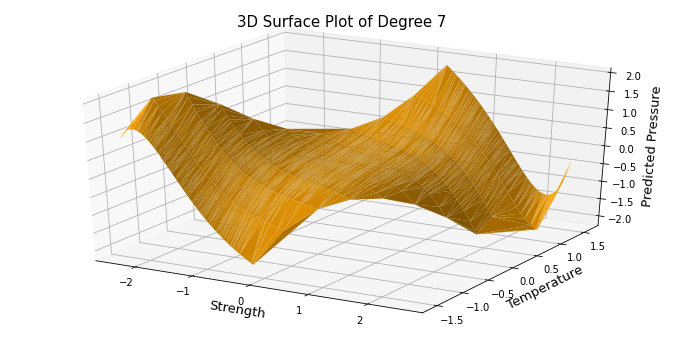

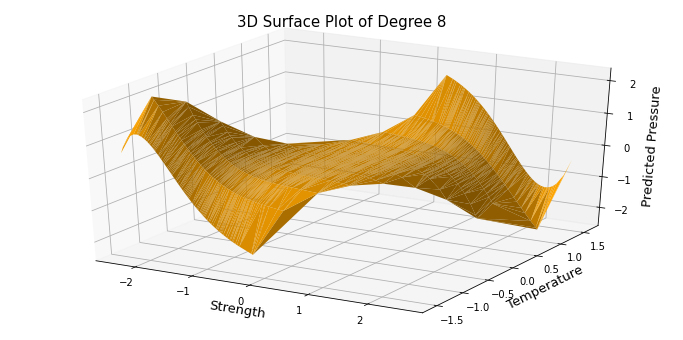

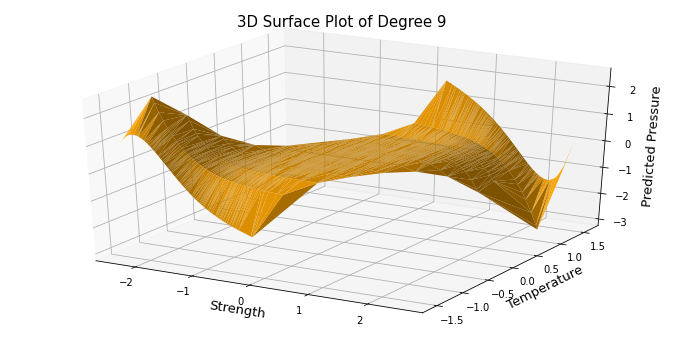

In [67]:
E_train=[0]*10
final_W=[]
E_test=[0]*10

iterations=10000
graph_GD=np.zeros((10,(int)(iterations/50)))
eta=[0.5,0.5,0.1,0.04,0.01,0.0035,0.0008,0.00015,0.00003,0.000004]
for i in range(10):
    print(i)
    e=eta[i]
    n=(int)((i+1)*(i+2)/2)
    W=np.random.randn(n,1)*0.01
    X=df_train.iloc[:,:n].to_numpy()
    error,W_optimized,graph=GD(X,W,e,Y=y_actual_train,iterations=iterations,deg=i,graph=graph_GD)
    final_W.append(W_optimized)
    Er_train=np.dot(df_train.iloc[:,:n],W_optimized).T-y_actual_train
    E_train[i]=(np.mean(np.multiply(Er_train,Er_train)))
    Er_test=np.dot(df_test.iloc[:,:n],W_optimized).T-y_actual_test
    E_test[i]=(np.mean(np.multiply(Er_test,Er_test)))
    Y_pred=np.dot(X,W_optimized)
    y=[]
    for j in Y_pred:
      for r in j:
        y.append(r)
    stro=".png"
    t="3D Surface Plot of Degree "+str(i)
    fig=plt.figure(figsize=(12,6))
    ax1=fig.gca(projection="3d")
    ax1.set_title(t,fontsize=15)
    ax1.set_xlabel('Strength',fontsize=13)
    ax1.set_ylabel('Temperature',fontsize=13)
    ax1.set_zlabel('Predicted Pressure',fontsize=13)
    ax1.plot_trisurf(x1,x2,y,color='orange')
    fig.savefig(str(i)+stro)
    plt.show





In [ ]:
'''
E_train=np.dot(df_train.iloc[:,:n],W_optimized).T-y_actual_train
print(100-np.mean(np.abs(E_train)))
E_test=np.dot(df_test.iloc[:,:n],W_optimized).T-y_actual_test
print(100-np.mean(np.abs(E_test)))
'''

'\nE_train=np.dot(df_train.iloc[:,:n],W_optimized).T-y_actual_train\nprint(100-np.mean(np.abs(E_train)))\nE_test=np.dot(df_test.iloc[:,:n],W_optimized).T-y_actual_test\nprint(100-np.mean(np.abs(E_test)))\n'

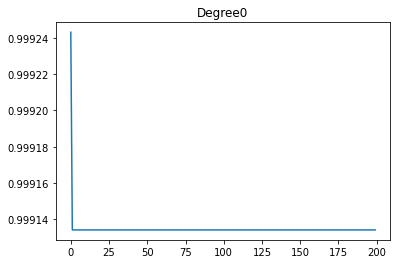

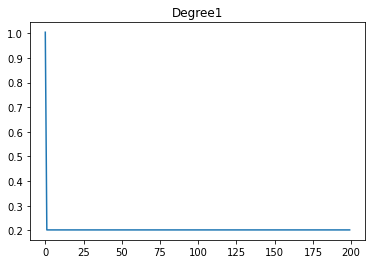

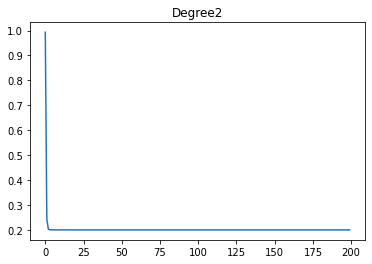

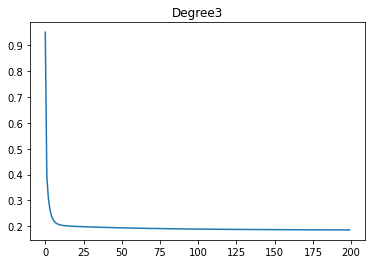

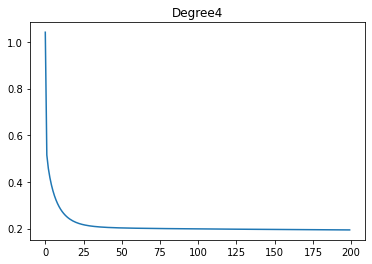

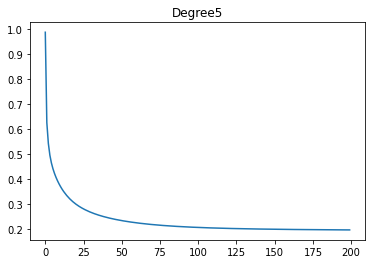

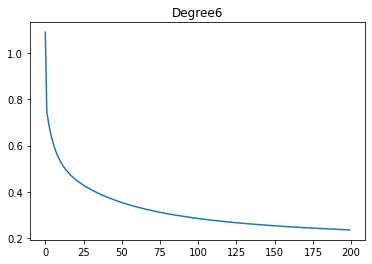

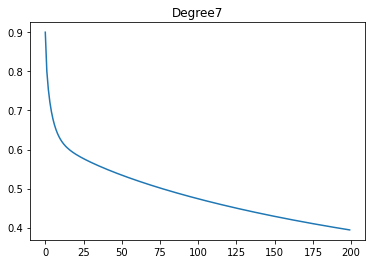

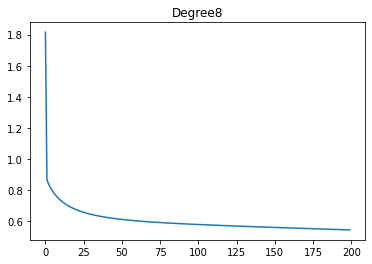

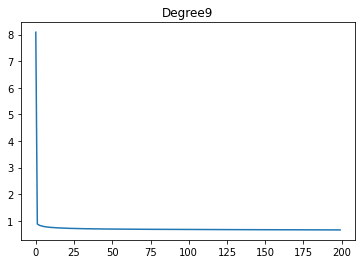

In [68]:
a=np.arange(0,(int)(iterations/50))
for i in range(10):
    plt.plot(a,graph_GD[i,:])
    tit='Degree'+str(i)
    
    plt.title(tit)
    plt.show()

In [69]:
print(E_train)
print(E_test)

[0.9991341991342072, 0.2017556764902804, 0.20058393399328803, 0.1860374971964633, 0.19397362188994458, 0.1951512462363467, 0.23593736270388968, 0.3935417525904578, 0.5441078273452796, 0.6612300542381736]
[0.9914876777204766, 0.1933399200050467, 0.19021968091063876, 0.17691982903388376, 0.18322828561318702, 0.18567661935948387, 0.2214138853257371, 0.3815428739786793, 0.5340099605343164, 0.6557016207700365]


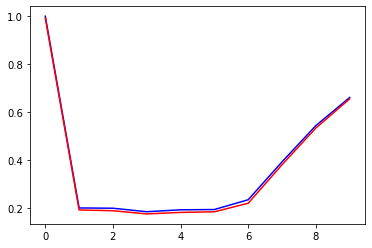

In [70]:
a=[0,1,2,3,4,5,6,7,8,9]
plt.plot(a,E_train,'b')
plt.plot(a,E_test,'r')
plt.show()

In [74]:
np.printoptions(threshold=np.inf)
print(graph_GD)

[[0.999243   0.9991342  0.9991342  ... 0.9991342  0.9991342  0.9991342 ]
 [1.00426392 0.20175587 0.20175568 ... 0.20175568 0.20175568 0.20175568]
 [0.99305054 0.24387918 0.20374267 ... 0.20058393 0.20058393 0.20058393]
 ...
 [0.90023351 0.80079373 0.75370081 ... 0.39543987 0.39480436 0.39417166]
 [1.81486954 0.8676537  0.84082162 ... 0.54502733 0.54472024 0.54441374]
 [8.08549381 0.88568662 0.84722975 ... 0.66165637 0.66151401 0.66137191]]


In [33]:
def SGD(X,W,eta,Y,iterations,deg,min,W_opt):
    training_error = np.zeros((iterations,1))
    count=0
    k=0
    W_opt=W
    for i in range(iterations):
      for index in range(X.shape[0]):
        ind_X=X[index,:]
        ind_Y=Y[index]
        E=np.dot(ind_X,W).T-ind_Y
        training_error[i]=np.multiply(E,E)
        for j in range(W.shape[0]):
            W[j]=W[j]-eta*np.multiply(E,X[index,j])
        if count%50==0:
          if k<graph.shape[1]:
            graph[deg][k]=training_error[i]
            k+=1
        count+=1
        Er_train=np.dot(df_train.iloc[:,:n],W).T-y_actual_train
        Overall_train=(np.mean(np.multiply(Er_train,Er_train)))
        #print(Overall_train)
        #print(min)
        if Overall_train<min:
          min=Overall_train
          W_opt=W    
       
    return training_error,W_opt

0
[[-0.39668049]]
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
1
[[-0.174335  ]
 [-1.88275537]
 [ 1.51529259]]
[[ 1.         -0.14549257 -0.29382432]
 [ 1.          0.93335449 -0.29382432]
 [ 1.          0.0028489   0.33173714]
 ...
 [ 1.         -1.22433963 -1.54494723]
 [ 1.          1.94477362  1.58286004]
 [ 1.          0.93335449  0.64451786]]
2
[[-0.23064063]
 [-1.77658126]
 [ 1.63123585]
 [-0.10478389]
 [-0.34066549]
 [-0.11397615]]
[[ 1.00000000e+00 -1.45492568e-01 -2.93824320e-01  2.11680872e-02
   4.27492547e-02  8.63327308e-02]
 [ 1.00000000e+00  9.33354494e-01 -2.93824320e-01  8.71150612e-01
  -2.74242249e-01  8.63327308e-02]
 [ 1.00000000e+00  2.84890350e-03  3.31737135e-01  8.11625114e-06
   9.45087084e-04  1.10049527e-01]
 ...
 [ 1.00000000e+00 -1.22433963e+00 -1.54494723e+00  1.49900753e+00
   1.89154012e+00  2.38686194e+00]
 [ 1.00000000e+00  1.94477362e+00  1.58286004e+00  3.78214441e+00
   3.07830445e+00  2.50544592e+00]
 [ 1.00000000e+00  9.33354494e-01  6.44517862e-01

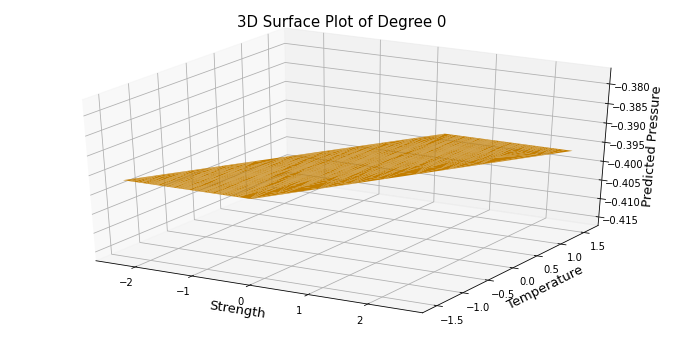

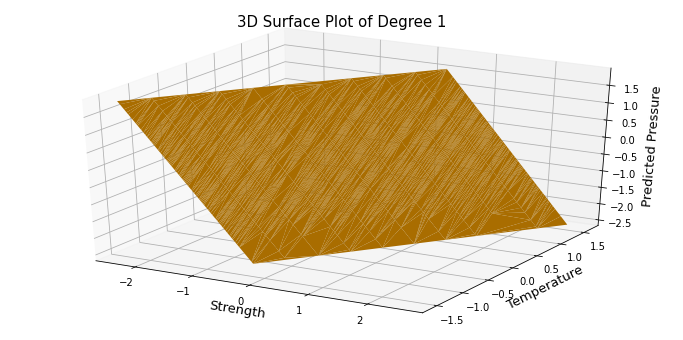

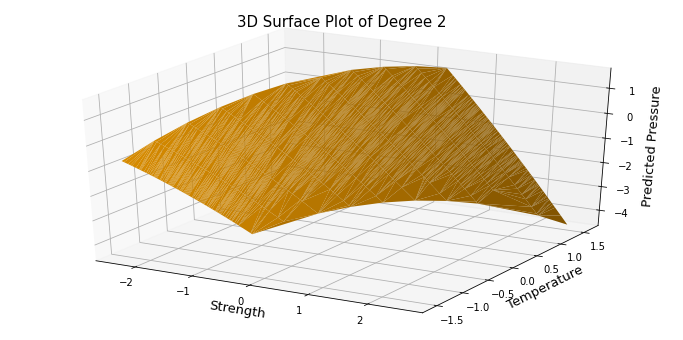

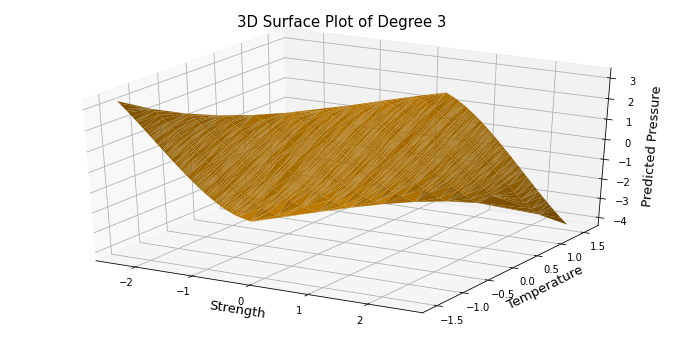

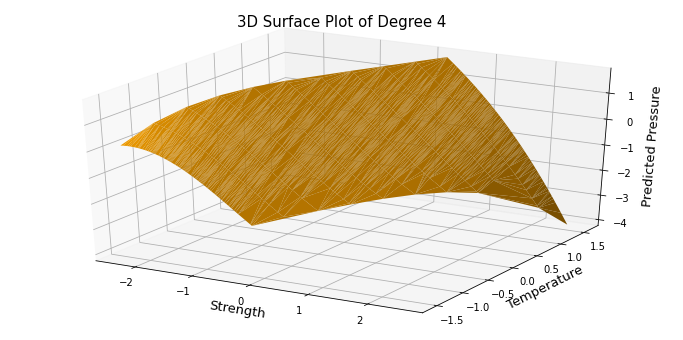

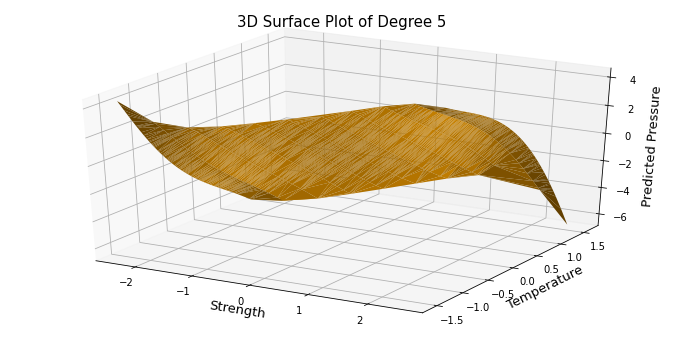

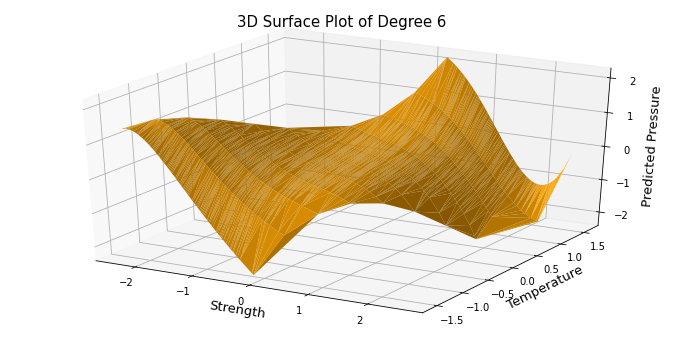

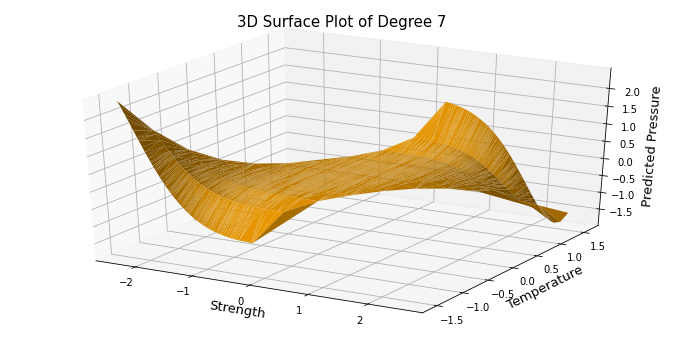

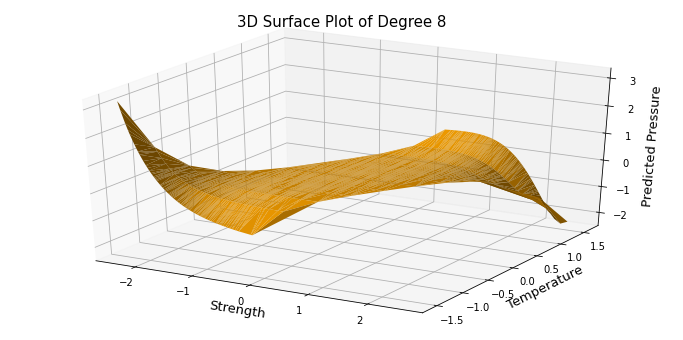

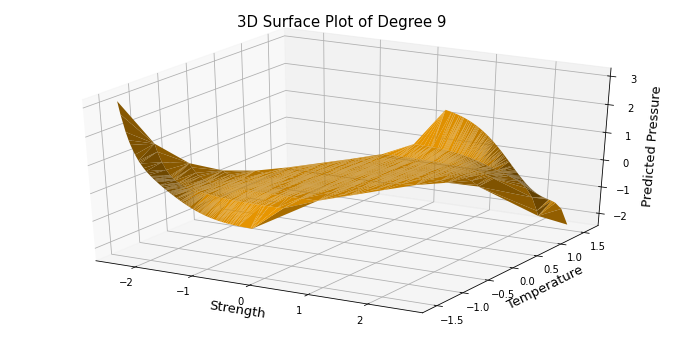

In [75]:
E_train=[0]*10
final_W=[]
E_test=[0]*10
X_dummy=df_train.iloc[:,:1].to_numpy()
iterations=50
graph=np.zeros((10,(int)((X_dummy.shape[0]*iterations)/50)))


eta=[0.1,0.1,0.05,0.009,0.002,0.0005,0.00007,0.000001,0.0000005,0.00000005]
for i in range(10):
    print(i)
    min=3
    e=eta[i]
    n=(int)((i+1)*(i+2)/2)
    W=np.random.randn(n,1)*0.01
    W_opt=np.zeros((n,1))
    X=df_train.iloc[:,:n].to_numpy()
    error,W_optimized=SGD(X,W,e,Y=y_actual_train,iterations=iterations,deg=i,W_opt=W_opt,min=min)
    print(W_optimized)
    print(X)
    E_train[i]=error.min()
    final_W.append(W_optimized)
    Er_train=np.dot(df_train.iloc[:,:n],W_optimized).T-y_actual_train
    E_train[i]=(np.mean(np.multiply(Er_train,Er_train)))
    Er_test=np.dot(df_test.iloc[:,:n],W_optimized).T-y_actual_test
    E_test[i]=(np.mean(np.multiply(Er_test,Er_test)))
    Y_pred=np.dot(X,W_optimized)
    y=[]
    for j in Y_pred:
      for r in j:
        y.append(r)
    stro="SGD.png"
    t="3D Surface Plot of Degree "+str(i)
    fig=plt.figure(figsize=(12,6))
    ax1=fig.gca(projection="3d")
    ax1.set_title(t,fontsize=15)
    ax1.set_xlabel('Strength',fontsize=13)
    ax1.set_ylabel('Temperature',fontsize=13)
    ax1.set_zlabel('Predicted Pressure',fontsize=13)
    ax1.plot_trisurf(x1,x2,y,color='orange')
    fig.savefig(str(i)+stro)
    plt.show

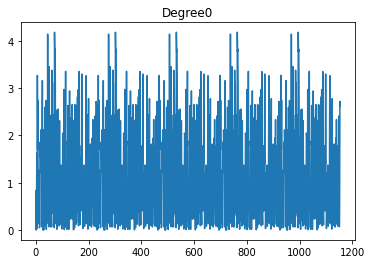

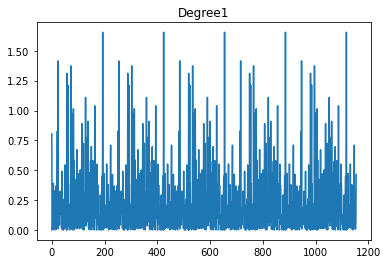

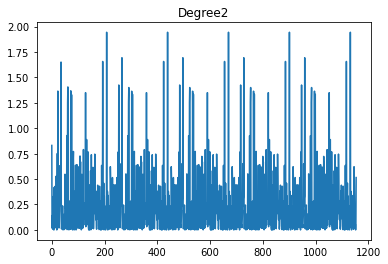

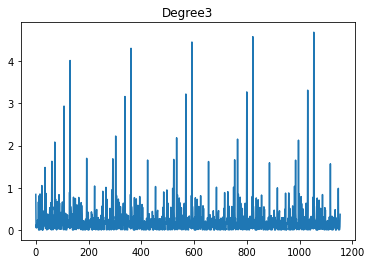

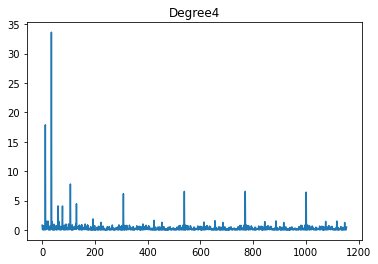

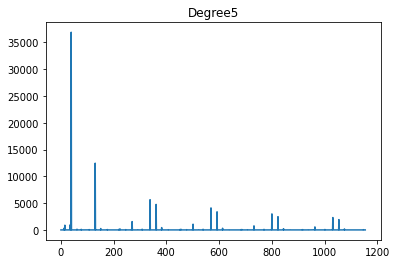

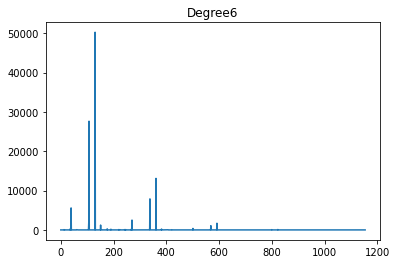

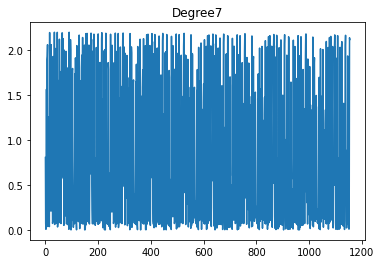

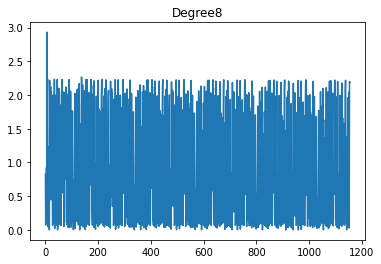

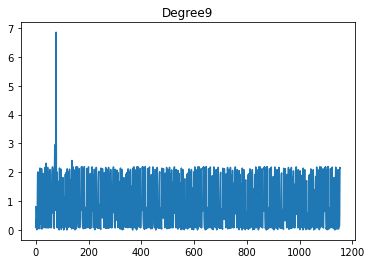

In [76]:
a=np.arange(0,(int)((X_dummy.shape[0]*iterations)/50))
for i in range(10):
    plt.plot(a,graph[i,:])
    tit='Degree'+str(i)
    
    plt.title(tit)
    plt.show()

In [78]:
print(E_train)
print(E_test)

[1.1564896086441794, 0.24897264028848842, 1.0054638892557402, 0.4189133134081476, 0.3098572530197008, 0.4187898824945824, 0.3697723879823114, 0.6837781277609277, 0.7550940364225152, 0.7809072327433831]
[1.0826053521817256, 0.245029938577069, 0.9530942099394092, 0.40289505697030287, 0.2974428238286299, 0.3677001393460043, 0.3556881925508624, 0.6770300786341963, 0.7474921404412469, 0.7685686600777419]


In [ ]:
'''
i=9
eta=0.0000001
iterations=30000
n=(int)((i+1)*(i+2)/2)
W=np.random.randn(n,1)*0.01
X=df_train.iloc[:,:n].to_numpy()
Y=y_actual_train
error,W=SGD(X,W,eta,Y=y_actual_train,iterations=iterations)
np.printoptions(threshold=np.inf)
print(error)
print(error.max())
Er_train=np.dot(df_train.iloc[:,:n],W).T-y_actual_train
E_train=(np.mean(np.multiply(Er_train,Er_train)))
Er_test=np.dot(df_test.iloc[:,:n],W).T-y_actual_test
E_test=(np.mean(np.multiply(Er_test,Er_test)))
print(E_train)
print(E_test)
'''

[[2.52686444e-01]
 [2.08698043e+00]
 [7.65736392e-01]
 ...
 [3.77482269e-30]
 [3.77482269e-30]
 [3.77482269e-30]]
261.2417938516607
0.9955961144186528
1.1424059483376678


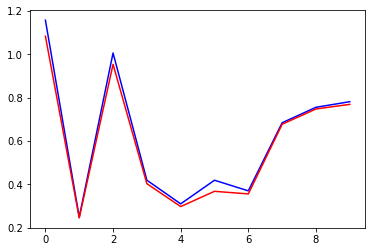

In [79]:
a=[0,1,2,3,4,5,6,7,8,9]
plt.plot(a,E_train,'b')
plt.plot(a,E_test,'r')
plt.show()

In [81]:
print(graph)

[[8.28763919e-01 7.67404532e-06 7.09250393e-04 ... 6.57585686e-01
  2.72075433e+00 2.62877382e+00]
 [8.03735399e-01 2.10196981e-03 1.30043004e-03 ... 8.03365530e-03
  8.33680714e-02 4.64670028e-01]
 [8.31025069e-01 1.88303776e-02 1.42257654e-01 ... 1.69665596e-05
  4.80817322e-02 5.15121114e-01]
 ...
 [8.06349535e-01 7.28132132e-02 7.17284918e-03 ... 4.62248726e-01
  2.13983049e+00 2.12059705e+00]
 [8.22822507e-01 7.20773018e-02 7.83432539e-01 ... 5.18696115e-01
  2.20173245e+00 2.18378145e+00]
 [8.02493854e-01 7.37118121e-02 3.93346056e-01 ... 5.66535671e-01
  2.16712428e+00 2.13982827e+00]]


In [51]:
def GD_RL(X,W,eta,Y,iterations,deg,s,lam):
    training_error = np.zeros((iterations,1))
    #eta *( )          /len(X)
    k=0
    if s=="Ridge":
        for i in range(iterations):
            np.reshape(Y,(1155,1))
            E=np.dot(X,W).T-Y
            training_error[i]=((np.sum(np.multiply(E,E))) + (lam/2)*np.sum(np.multiply(W,W)))/len(X)
            for j in range(W.shape[0]):
                W[j]=W[j]-eta*(2*np.sum(np.multiply(E,X[:,j]))+lam*W[j])/len(X)
            #if(i%50==0):
                #graph_ridge[deg-1][j]=training_error[i]
                #k+=1
        return training_error,W
    else:
        for i in range(iterations):
            np.reshape(Y,(1155,1))
            E=np.dot(X,W).T-Y
            training_error[i]=((np.sum(np.multiply(E,E))) + (lam/2)*(np.sum(np.abs(W))))/len(X)
            for j in range(W.shape[0]):
                W[j]=W[j]-eta*(2*np.sum(np.multiply(E,X[:,j]))+lam*np.sign(W[j]))/len(X)
            #if(i%50==0):
                #graph_ridge[deg-1][j]=training_error[i]
                #k+=1
        return training_error,W


In [ ]:
'''
i=9
lam=0.00005
eta=0.00001
iterations=100000
n=(int)((i+1)*(i+2)/2)
W=np.random.randn(n,1)*0.01
X=df_train.iloc[:,:n].to_numpy()
Y=y_actual_train
error,W=GD_RL(X,W,eta,Y=y_actual_train,iterations=iterations,deg=i,s="Ridge",lam=lam)
Er_train=np.dot(df_train.iloc[:,:n],W).T-y_actual_train
E_train=(np.mean(np.multiply(Er_train,Er_train)))
Er_test=np.dot(df_test.iloc[:,:n],W).T-y_actual_test
E_test=(np.mean(np.multiply(Er_test,Er_test)))
print(E_train)
print(E_test)

'''

In [47]:
lam=[]
E_train_list=[]
E_test_list=[]
for i in range(5):
  lam.append(0.000005+i*0.000001)
for i in lam:
  k=9
  
  eta=0.000005
  iterations=50000
  n=(int)((k+1)*(k+2)/2)
  W=np.random.randn(n,1)*0.01
  X=df_train.iloc[:,:n].to_numpy()
  Y=y_actual_train
  error,W=GD_RL(X,W,eta,Y=y_actual_train,iterations=iterations,deg=k,s="Ridge",lam=i)
  Er_train=np.dot(df_train.iloc[:,:n],W).T-y_actual_train
  E_train=(np.mean(np.multiply(Er_train,Er_train)))
  Er_test=np.dot(df_test.iloc[:,:n],W).T-y_actual_test
  E_test=(np.mean(np.multiply(Er_test,Er_test)))
  E_train_list.append(E_train)
  E_test_list.append(E_test)
  


  




Streaming output truncated to the last 5000 lines.
[0.5626386]
[0.56263654]
[0.56263449]
[0.56263243]
[0.56263038]
[0.56262832]
[0.56262627]
[0.56262421]
[0.56262216]
[0.5626201]
[0.56261805]
[0.562616]
[0.56261394]
[0.56261189]
[0.56260983]
[0.56260778]
[0.56260572]
[0.56260367]
[0.56260161]
[0.56259956]
[0.5625975]
[0.56259545]
[0.5625934]
[0.56259134]
[0.56258929]
[0.56258723]
[0.56258518]
[0.56258312]
[0.56258107]
[0.56257902]
[0.56257696]
[0.56257491]
[0.56257285]
[0.5625708]
[0.56256875]
[0.56256669]
[0.56256464]
[0.56256258]
[0.56256053]
[0.56255848]
[0.56255642]
[0.56255437]
[0.56255231]
[0.56255026]
[0.56254821]
[0.56254615]
[0.5625441]
[0.56254204]
[0.56253999]
[0.56253794]
[0.56253588]
[0.56253383]
[0.56253178]
[0.56252972]
[0.56252767]
[0.56252562]
[0.56252356]
[0.56252151]
[0.56251945]
[0.5625174]
[0.56251535]
[0.56251329]
[0.56251124]
[0.56250919]
[0.56250713]
[0.56250508]
[0.56250303]
[0.56250097]
[0.56249892]
[0.56249687]
[0.56249482]
[0.56249276]
[0.56249071]
[0.562488

In [48]:
E_train_n=np.array(E_train_list)
E_train_n

array([0.55355664, 0.55870489, 0.55520601, 0.55030977, 0.55267369])

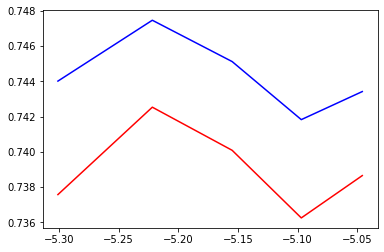

In [49]:
BGD_R_R=pd.DataFrame()
lam_n=np.array(lam)
E_train_n=np.array(E_train_list)
E_test_n=np.array(E_test_list)
E_train_n=np.sqrt(E_train_n)
E_test_n=np.sqrt(E_test_n)
BGD_R_R=pd.concat([BGD_R_R,pd.DataFrame(lam_n)],ignore_index=True,axis=1)
BGD_R_R=pd.concat([BGD_R_R,pd.DataFrame(E_train_n)],ignore_index=True,axis=1)
BGD_R_R=pd.concat([BGD_R_R,pd.DataFrame(E_test_n)],ignore_index=True,axis=1)
a=lam
a=np.array(a)
a=np.log10(a)
plt.plot(a,E_train_n,'b')
plt.plot(a,E_test_n,'r')
plt.show()

In [50]:
BGD_R_R

0         1         2
0  0.000005  0.744014  0.737577
1  0.000006  0.747466  0.742534
2  0.000007  0.745121  0.740088
3  0.000008  0.741829  0.736253
4  0.000009  0.743420  0.738654

In [ ]:
'''
k=9
lam=0.0000005
eta=0.000008
iterations=50000
n=(int)((k+1)*(k+2)/2)
W=np.random.randn(n,1)*0.01
X=df_train.iloc[:,:n].to_numpy()
Y=y_actual_train
error,W=GD_RL(X,W,eta,Y=y_actual_train,iterations=iterations,deg=k,s="lasso",lam=lam)
Er_train=np.dot(df_train.iloc[:,:n],W).T-y_actual_train
E_train=(np.mean(np.multiply(Er_train,Er_train)))
Er_test=np.dot(df_test.iloc[:,:n],W).T-y_actual_test
E_test=(np.mean(np.multiply(Er_test,Er_test)))
print(E_train)
print(E_test)
'''

[15.72807721]
[9.67713331]
[6.2312365]
[4.23142949]
[3.04876786]
[2.33582948]
[1.89731959]
[1.62160975]
[1.44389521]
[1.32601714]
[1.24521702]
[1.18776276]
[1.14527893]
[1.11260365]
[1.08652122]
[1.06500459]
[1.04675824]
[1.03094023]
[1.01699207]
[1.00453399]
[0.99330003]
[0.98309768]
[0.97378268]
[0.96524303]
[0.95738892]
[0.95014626]
[0.94345242]
[0.93725351]
[0.93150244]
[0.92615762]
[0.92118206]
[0.91654265]
[0.91220963]
[0.90815621]
[0.90435815]
[0.90079357]
[0.89744263]
[0.89428736]
[0.89131146]
[0.88850013]
[0.88583995]
[0.88331871]
[0.88092533]
[0.87864973]
[0.87648274]
[0.87441603]
[0.87244198]
[0.8705537]
[0.86874487]
[0.86700974]
[0.86534307]
[0.86374008]
[0.8621964]
[0.86070802]
[0.85927129]
[0.85788287]
[0.85653969]
[0.85523894]
[0.85397804]
[0.85275463]
[0.85156653]
[0.85041173]
[0.84928839]
[0.84819482]
[0.84712943]
[0.84609079]
[0.84507754]
[0.84408845]
[0.84312235]
[0.84217819]
[0.84125496]
[0.84035175]
[0.83946767]
[0.83860194]
[0.83775379]
[0.83692252]
[0.83610747]
[

In [53]:
lam=[]
E_train_list=[]
E_test_list=[]
for i in range(5):
  lam.append(0.0000001+i*0.0000003)
for i in lam:
  k=9
  
  eta=0.000005
  iterations=50000
  n=(int)((k+1)*(k+2)/2)
  W=np.random.randn(n,1)*0.01
  X=df_train.iloc[:,:n].to_numpy()
  Y=y_actual_train
  error,W=GD_RL(X,W,eta,Y=y_actual_train,iterations=iterations,deg=k,s="lasso",lam=i)
  Er_train=np.dot(df_train.iloc[:,:n],W).T-y_actual_train
  E_train=(np.mean(np.multiply(Er_train,Er_train)))
  Er_test=np.dot(df_test.iloc[:,:n],W).T-y_actual_test
  E_test=(np.mean(np.multiply(Er_test,Er_test)))
  E_train_list.append(E_train)
  E_test_list.append(E_test)

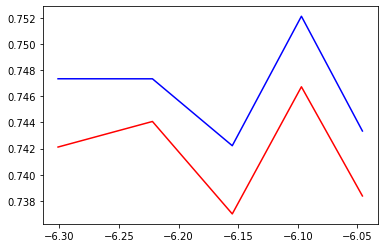

In [54]:
BGD_R_L=pd.DataFrame()
lam_n=np.array(lam)
E_train_n=np.array(E_train_list)
E_test_n=np.array(E_test_list)
E_train_n=np.sqrt(E_train_n)
E_test_n=np.sqrt(E_test_n)
BGD_R_L=pd.concat([BGD_R_L,pd.DataFrame(lam_n)],ignore_index=True,axis=1)
BGD_R_L=pd.concat([BGD_R_L,pd.DataFrame(E_train_n)],ignore_index=True,axis=1)
BGD_R_L=pd.concat([BGD_R_L,pd.DataFrame(E_test_n)],ignore_index=True,axis=1)
a=[0.0000005,0.0000006,0.0000007,0.0000008,0.0000009]
a=np.array(a)
a=np.log10(a)
plt.plot(a,E_train_n,'b')
plt.plot(a,E_test_n,'r')
plt.show()

In [55]:
BGD_R_L

0         1         2
0  1.000000e-07  0.747336  0.742114
1  4.000000e-07  0.747332  0.744070
2  7.000000e-07  0.742216  0.737001
3  1.000000e-06  0.752117  0.746724
4  1.300000e-06  0.743341  0.738375

In [59]:
def SGD_RL(X,W,eta,Y,iterations,deg,s,lam,min,W_opt):
    training_error = np.zeros((iterations,1))
    
    k=0
    if s=='Ridge':
      print("Ridge")
      for i in range(iterations):
        for index in range(X.shape[0]):
            ind_X=X[index,:]
            ind_Y=Y[index]
            E=np.dot(ind_X,W).T-ind_Y
            training_error[i]=np.multiply(E,E)+(lam/2)*(np.sum(np.multiply(W,W)))
            for j in range(W.shape[0]):
                W[j]=W[j]-eta*(np.multiply(E,X[index,j])+lam*W[j])
            Er_train=np.dot(df_train.iloc[:,:n],W).T-y_actual_train
            Overall_train=(np.mean(np.multiply(Er_train,Er_train)))
            if Overall_train<min:
              min=Overall_train
              W_opt=W
       
      return training_error,W,min,W_opt
    else:
      for i in range(iterations):
        for index in range(X.shape[0]):
            ind_X=X[index,:]
            ind_Y=Y[index]
            E=np.dot(ind_X,W).T-ind_Y
            training_error[i]=np.multiply(E,E)+(lam)*(np.sum(np.abs(W)))
            for j in range(W.shape[0]):
                W[j]=W[j]-eta*(np.multiply(E,X[index,j])+lam*np.sign(W[j]))
            Er_train=np.dot(df_train.iloc[:,:n],W).T-y_actual_train
            Overall_train=(np.mean(np.multiply(Er_train,Er_train)))
            if Overall_train<min:
              min=Overall_train
              W_opt=W
            
       
      return training_error,W,min,W_opt  

    

In [60]:
lam=[]
E_train_list=[]
E_test_list=[]

for i in range(5):
  lam.append(0.00000003+i*0.00000001)
for i in lam:
  k=9
  min=3
  eta=0.0000001
  iterations=50
  n=(int)((k+1)*(k+2)/2)
  W=np.random.randn(n,1)*0.01
  X=df_train.iloc[:,:n].to_numpy()
  Y=y_actual_train
  error,W,min,W_opt=SGD_RL(X,W,eta,Y=y_actual_train,iterations=iterations,deg=k,s="Lasso",lam=i,min=min,W_opt=W_opt)
  Er_train=np.dot(df_train.iloc[:,:n],W_opt).T-y_actual_train
  E_train=(np.mean(np.multiply(Er_train,Er_train)))
  Er_test=np.dot(df_test.iloc[:,:n],W_opt).T-y_actual_test
  E_test=(np.mean(np.multiply(Er_test,Er_test)))
  E_train_list.append(E_train)
  E_test_list.append(E_test)


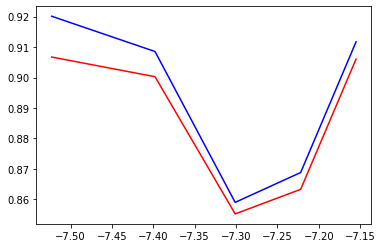

In [61]:
SGD_R_R=pd.DataFrame()
lam_n=np.array(lam)
E_train_n=np.array(E_train_list)
E_test_n=np.array(E_test_list)
E_train_n=np.sqrt(E_train_n)
E_test_n=np.sqrt(E_test_n)
SGD_R_R=pd.concat([SGD_R_R,pd.DataFrame(lam_n)],ignore_index=True,axis=1)
SGD_R_R=pd.concat([SGD_R_R,pd.DataFrame(E_train_n)],ignore_index=True,axis=1)
SGD_R_R=pd.concat([SGD_R_R,pd.DataFrame(E_test_n)],ignore_index=True,axis=1)
a=lam
a=np.array(a)
a=np.log10(a)
plt.plot(a,E_train_n,'b')
plt.plot(a,E_test_n,'r')
plt.show()

In [62]:
SGD_R_R

0         1         2
0  3.000000e-08  0.920119  0.906729
1  4.000000e-08  0.908540  0.900271
2  5.000000e-08  0.859037  0.855248
3  6.000000e-08  0.868833  0.863321
4  7.000000e-08  0.911709  0.906051

In [63]:
lam=[]
E_train_list=[]
E_test_list=[]

for i in range(5):
  lam.append(0.00000003+i*0.00000001)
for i in lam:
  k=9
  min=3
  eta=0.0000001
  iterations=50
  n=(int)((k+1)*(k+2)/2)
  W=np.random.randn(n,1)*0.01
  X=df_train.iloc[:,:n].to_numpy()
  Y=y_actual_train
  error,W,min,W_opt=SGD_RL(X,W,eta,Y=y_actual_train,iterations=iterations,deg=k,s="Ridge",lam=i,min=min,W_opt=W_opt)
  Er_train=np.dot(df_train.iloc[:,:n],W_opt).T-y_actual_train
  E_train=(np.mean(np.multiply(Er_train,Er_train)))
  Er_test=np.dot(df_test.iloc[:,:n],W_opt).T-y_actual_test
  E_test=(np.mean(np.multiply(Er_test,Er_test)))
  E_train_list.append(E_train)
  E_test_list.append(E_test)

Ridge
Ridge
Ridge
Ridge
Ridge


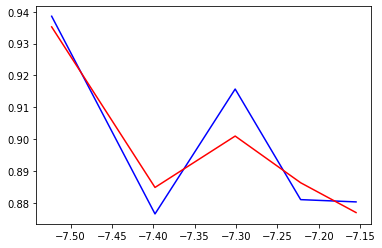

In [64]:
SGD_R_R=pd.DataFrame()
lam_n=np.array(lam)
E_train_n=np.array(E_train_list)
E_test_n=np.array(E_test_list)
E_train_n=np.sqrt(E_train_n)
E_test_n=np.sqrt(E_test_n)
SGD_R_R=pd.concat([SGD_R_R,pd.DataFrame(lam_n)],ignore_index=True,axis=1)
SGD_R_R=pd.concat([SGD_R_R,pd.DataFrame(E_train_n)],ignore_index=True,axis=1)
SGD_R_R=pd.concat([SGD_R_R,pd.DataFrame(E_test_n)],ignore_index=True,axis=1)
a=lam
a=np.array(a)
a=np.log10(a)
plt.plot(a,E_train_n,'b')
plt.plot(a,E_test_n,'r')
plt.show()

In [65]:
SGD_R_R

0         1         2
0  3.000000e-08  0.938573  0.935232
1  4.000000e-08  0.876492  0.884807
2  5.000000e-08  0.915709  0.900938
3  6.000000e-08  0.880978  0.886281
4  7.000000e-08  0.880266  0.876919